## In this assignment students need to predict whether a person makes over 50K per year or       not from classic adult dataset using XGBoost.

In [1]:
#  Import sme required libraries
import numpy as np      # Linear algebra
import pandas as pd     # data Processing

#  Libraries for visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# import for mapping the categorical variable
from sklearn.preprocessing import LabelEncoder

# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier #ML algorithm 
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import the metrics class
from sklearn import metrics

### Load the Dataset

In [2]:
adult_data_set= pd.read_csv('adult_ XGBoost.csv')
adult_data_set.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Analyzing the data:

In [3]:
# Adult dataset info to find column and count of data 
adult_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### We get all of the information which we are looking like data types in this datasets are  int64(6), object(9), (count of null )here is no null values , row count, etc.Memory uses And total 15 column in this dataset

In [4]:
# Identityfy the categorigal data column in adult dataset 

adult_data_set.dtypes == "object"
a = adult_data_set.dtypes[adult_data_set.dtypes == 'object'].index
a
#adult_data_set[a].describe()


Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [5]:
adult_data_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

### Data Cleaning:

In [6]:
#Finding the special characters in the data frame 
adult_data_set.isin(['?']).sum(axis=0)

#cols =[ 'workclass', 'occupation','native.country']

# for i in cols:
    #adult_data_set[i] = adult_data_set[i].replace('?',np.nan)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
# replace the Special character ('?') to Nan and then drop the column
adult_data_set['workclass'] = adult_data_set['workclass'].replace('?',np.nan)
adult_data_set['native.country'] = adult_data_set['native.country'].replace('?',np.nan)
adult_data_set['occupation'] = adult_data_set['occupation'].replace('?',np.nan)

# dropping the Nan row
adult_data_set.dropna(how = 'any', inplace=True)

#removing '?' containing rows
#adult_data_set = adult_data_set[(adult_data_set != '?').all(axis=1)]


In [8]:
adult_data_set.isnull().sum()

print('Total shape (index & column) : ' ,adult_data_set.shape)
print ('index count :  ' , adult_data_set.shape[0])

Total shape (index & column) :  (30162, 15)
index count :   30162


### Feature Engineering:

In [9]:
#running a loop of value_counts of each column to find out unique values. 
for c in adult_data_set.columns:
    print ("---- %s ---" % c)
    print (adult_data_set[c].value_counts())

---- age ---
36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
---- workclass ---
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
---- fnlwgt ---
203488     13
164190     12
121124     12
113364     12
123011     12
           ..
1268339     1
542265      1
312897      1
58447       1
125489      1
Name: fnlwgt, Length: 20263, dtype: int64
---- education ---
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64
---- educatio

In [10]:
#Mapping the data into nummerical data using map function 
adult_data_set['income']=adult_data_set['income'].map({'<=50K': 0, '>50K': 1})

In [11]:
for column in adult_data_set:
    enc=LabelEncoder()
    if adult_data_set.dtypes[column]==np.object:
         adult_data_set[column]=enc.fit_transform(adult_data_set[column])

#### Correlation using heatmap

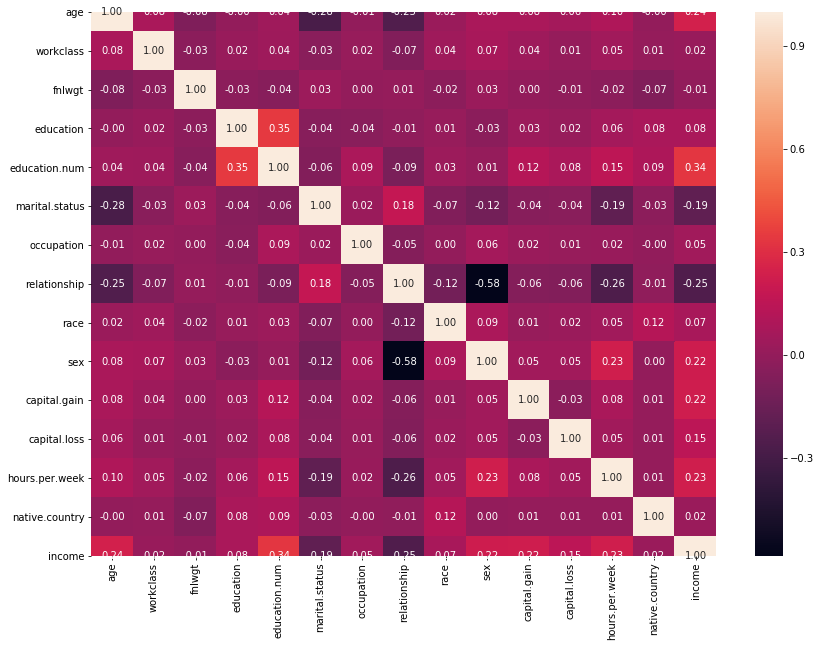

In [12]:
plt.figure(figsize = (14,10))

sns.heatmap(adult_data_set.corr(),annot=True,fmt='.2f')
plt.show()

 from the heatmap "education" and "education.num" are highly correlated, same can be said about the "marital.status" and "relationship" ,thus,we can drop "relationship" and "education".

In [13]:
adult_data_set = adult_data_set.drop(['relationship', 'education'],axis =1)
plt.show()

We can also drop "occupation" as "workclass" is sufficient. Furthermore,"fnlwgt" is not useful to us as it refers to only the sampling in the census conducted and has no practical effect on the label.Also we drop the "native.country" as more are from single country(USA) which can cause bias.

In [14]:
adult_data_set=adult_data_set.drop(['occupation','fnlwgt','native.country'],axis=1)

In [15]:
#Dataset after preprocessing

adult_data_set.head()

,age,workclass,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,2,9,6,4,0,0,4356,18,0
3,54,2,4,0,4,0,0,3900,40,0
4,41,2,10,5,4,0,0,3900,40,0
5,34,2,9,0,4,0,0,3770,45,0
6,38,2,6,5,4,1,0,3770,40,0


### Data Visualization:

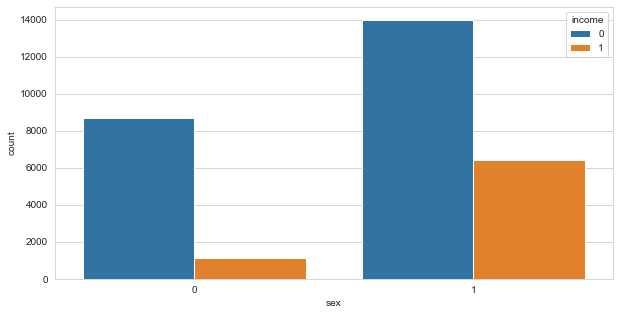

In [16]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot('sex',data = adult_data_set, hue ='income')  # female= 0, male = 1

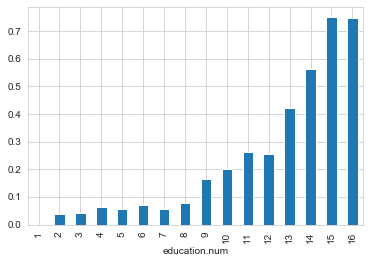

In [17]:
adult_data_set.groupby('education.num').income.mean().plot(kind='bar')


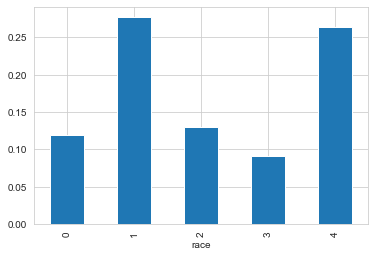

In [18]:
adult_data_set.groupby('race').income.mean().plot(kind='bar')

### Splitting Data:

In [19]:
Xtrain = adult_data_set.drop(['income'], axis=1)

ytrain = adult_data_set['income']

In [20]:
X_train ,X_test , y_train, y_test =  train_test_split(Xtrain,ytrain,test_size  = 0.30, random_state =45)

### Model selection 

#### XGBoost
Random forest follows the concept of bagging,the other method is boosting.In Boosting algorithms each classifier is trained on data, taking into account the previous classifiers’ success. After each training step, the weights are redistributed. Misclassified data increases its weights to emphasise the most difficult cases. In this way, subsequent learners will focus on them during their training.

Few boosting algorihtms are adaboost,gradientboosting,XGBoost.XGBoost is one of the most popular machine learning algorithm these days.

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core.

In [21]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(Xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:36:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [22]:
y_pred =model.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.8814233616974251

In [24]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [25]:
# creating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6790
           1       0.81      0.69      0.74      2259

    accuracy                           0.88      9049
   macro avg       0.85      0.82      0.83      9049
weighted avg       0.88      0.88      0.88      9049



In [26]:
y_test.shape

(9049,)

In [27]:
from sklearn.metrics import confusion_matrix
 
results = confusion_matrix(y_test,y_pred)
print(results)

[[6422  368]
 [ 705 1554]]
